

>Import des Donnees 








In [6]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
decoded_newswire1 = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_newswire1

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [7]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

In [ ]:
help(enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable[, start]) -> iterator for index, value of iterable
 |  
 |  Return an enumerate object.  iterable must be another object that supports
 |  iteration.  The enumerate object yields pairs containing a count (from
 |  start, which defaults to zero) and a value yielded by the iterable argument.
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



In [ ]:
train_data.shape

(8982,)

Preparation Des Donnees

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Construction Modele Deep Learning

In [10]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Validation Approach

In [13]:
x_val = x_train[:1000]
partial_x_train= x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training...

In [14]:
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 127us/step - loss: 2.6355 - accuracy: 0.4976 - val_loss: 1.7982 - val_accuracy: 0.6220
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.4940 - accuracy: 0.6873 - val_loss: 1.3600 - val_accuracy: 0.6900
Epoch 3/20
7982/7982 [==============================] - 1s 111us/step - loss: 1.1017 - accuracy: 0.7554 - val_loss: 1.1532 - val_accuracy: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.8631 - accuracy: 0.8153 - val_loss: 1.0537 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.6874 - accuracy: 0.8598 - val_loss: 0.9597 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.5488 - accuracy: 0.8898 - val_loss: 0.9213 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 114us/step - loss

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

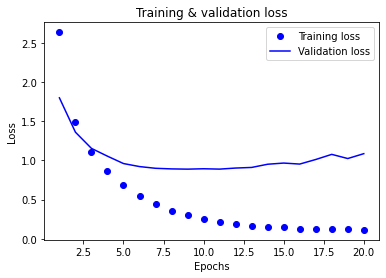

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

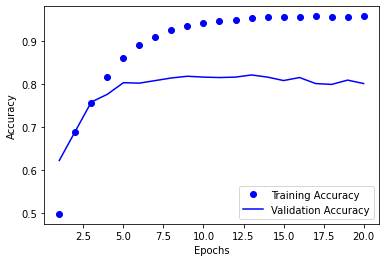

In [19]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc , 'bo', label= 'Training Accuracy')
plt.plot(epochs , val_acc , 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
history = model.fit(partial_x_train,partial_y_train, epochs=9, batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.1081 - accuracy: 0.9583 - val_loss: 1.0985 - val_accuracy: 0.7960
Epoch 2/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.1037 - accuracy: 0.9590 - val_loss: 1.0964 - val_accuracy: 0.8070
Epoch 3/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.1057 - accuracy: 0.9577 - val_loss: 1.1010 - val_accuracy: 0.7980
Epoch 4/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.1015 - accuracy: 0.9568 - val_loss: 1.1313 - val_accuracy: 0.8020
Epoch 5/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.1038 - accuracy: 0.9575 - val_loss: 1.1226 - val_accuracy: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.0964 - accuracy: 0.9603 - val_loss: 1.1738 - val_accuracy: 0.7880
Epoch 7/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.097

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 86us/step


In [22]:
results

[1.3421410955919926, 0.7885128855705261]